# Car price prediction project
## Machine Learning for Regression
Following along lesson 2 of Machine Learning ZoomCamp

In [1]:
import pandas as pd
import numpy as np

## Reading the Data

In [2]:
car_df = pd.read_csv('car-features/data.csv')

In [3]:
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Creating consistent column names
The columns have inconsistent cases and characters between words (either a space or an underscore)

In [4]:
car_df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

In [6]:
car_df.head(n=2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


The text inside of the dataframe is also inconsistent. First we have to select the columns that have text data. 
They wil have type `object`

In [7]:
car_df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
text_columns = list(car_df.dtypes[car_df.dtypes == 'object'].index)
text_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in text_columns:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')

Question for the future: is there a way to do this without a for-loop?

In [10]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Analysis
Use describe to view summary statistics for numeric columns in the data set

In [11]:
car_df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Use unique to sample the values for text columns

In [12]:
for col in text_columns:
    print(col)
    print("Sample values: ", car_df[col].unique()[:5])
    print("Number of unique values: ", car_df[col].nunique())
    print()

make
Sample values:  ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values:  48

model
Sample values:  ['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values:  914

engine_fuel_type
Sample values:  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values:  10

transmission_type
Sample values:  ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values:  5

driven_wheels
Sample values:  ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values:  4

market_category
Sample values:  ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Number of unique values:  71

vehicle_size
Sample values:  ['compact' 'midsize' 'large']
Number of unique values:  3

vehicle_style
Sample values:  ['coupe' 'convertible' 'sedan' 'wagon' '4dr_h

### Distribution of price

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

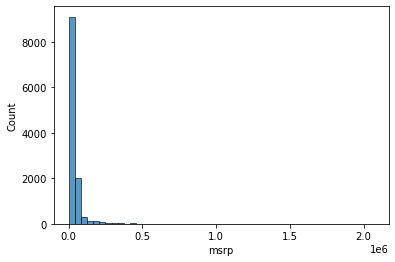

In [14]:
sns.histplot(car_df.msrp, bins = 50)

It's hard to see outliers with the histogram, so I will try a boxplot

<AxesSubplot:xlabel='msrp'>

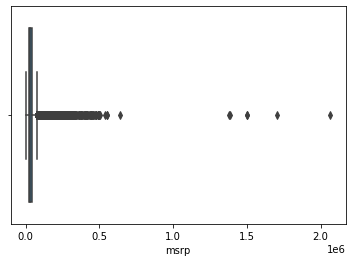

In [15]:
sns.boxplot(x = car_df.msrp)

Some cars are really expensive. It is causing the price to have a long tail distribuition

<AxesSubplot:xlabel='msrp', ylabel='Count'>

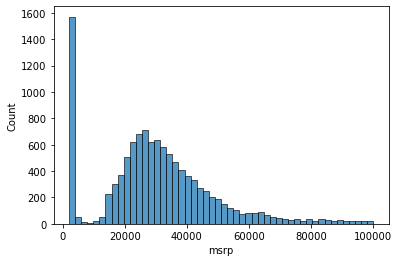

In [16]:
sns.histplot(car_df.msrp[car_df.msrp < 100_000], bins = 50)

This type of long-tailed distribuition is not good for marchine learning. It will confuse the model. 
The technique that is used to solve this problem is to apply log to the long-tailed column.
The only problem is that if you have value 0, it will create an error because log(0) doesn't exist. It's common to add 1 to all the values of the column.

In [17]:
np.log([0, 100, 1_000, 10_000, 1000_0000])

C:\Users\sofig\AppData\Local\Temp/ipykernel_16564/3400292186.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 100, 1_000, 10_000, 1000_0000])


array([       -inf,  4.60517019,  6.90775528,  9.21034037, 16.11809565])

In [18]:
# this numpy function helps add 1 to all the values in the list and then calculates the log
np.log1p([0, 100, 1_000, 10_000, 1000_0000])

array([ 0.        ,  4.61512052,  6.90875478,  9.21044037, 16.11809575])

In [19]:
price_log = np.log1p(car_df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

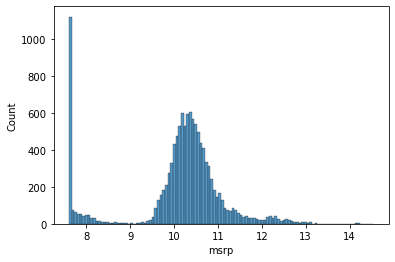

In [20]:
sns.histplot(price_log)

## Missing values

In [21]:
car_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up validation framework
We will be using a 60%-20%-20% split for training, validation, testing respectively.

In [22]:
len(car_df)

11914

In [23]:
n = len(car_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [24]:
n, n_val + n_test + n_train

(11914, 11914)

In [25]:
n_val, n_test, n_train

(2382, 2382, 7150)

We can try to split the dataframe with iloc but it causes a problem because the data is ordered by make

In [26]:
df_train = car_df.iloc[:n_train]
df_val = car_df.iloc[n_train:n_train+n_val]
df_test = car_df.iloc[n_train+n_val:]

In [27]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [28]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


We can create ids for every row in the dataframe and shuffle them to avoid errors from sampling ordered data

In [29]:
ids = np.arange(n)

In [30]:
np.random.seed(2)
np.random.shuffle(ids)

In [31]:
ids

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [32]:
df_train = car_df.iloc[ids[:n_train]]
df_val = car_df.iloc[ids[n_train:n_train+n_val]]
df_test = car_df.iloc[ids[n_train+n_val:]]

In [33]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [34]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [35]:
# reset index of the dataframes for convenience
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
# Transform price to log(price) for each dataset
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [37]:
print(y_train)
print(len(y_train))

[ 9.57574708  9.887663    9.89323518 ... 10.45380308 12.62248099
 10.54061978]
7150


In [38]:
# Delete price from the dataframes to avoid accidentally using it
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

In [39]:
xi = [453, 11, 86]

In [40]:
w0 = 0
w = [1, 1, 1]

In [41]:
def linear_regresion(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [42]:
linear_regresion(xi)

550

In [43]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [44]:
w_new = [w0] + w

In [45]:
def linear_regresion(xi):
    xi = [1] + xi
    return w0 + dot(xi, w_new)

In [46]:
linear_regresion(xi)

550.0

In [47]:
def linear_regresion(X):
    return X.dot(w_new)

In [48]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
linear_regresion(X)

array([1557, 2188,  550])

In [50]:
# to find the weights we have to train the linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [51]:
X = [[148, 24, 1385],
    [158, 34, 144],
    [168, 54, 86],
    [138, 27, 185],
    [158, 52, 1525],
    [188, 56, 147]]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 158,   34,  144],
       [ 168,   54,   86],
       [ 138,   27,  185],
       [ 158,   52, 1525],
       [ 188,   56,  147]])

In [52]:
y = [1000, 24000, 5002, 58322, 3298, 7433]

In [53]:
train_linear_regression(X, y)

(200577.2221209154, array([-1106.55805309,   147.91733911,   -23.28954511]))

## Car price baseline model
using all numerical columns

In [54]:
car_df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [55]:
car_df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [56]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [57]:
X_train = df_train[base].values

In [58]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [59]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [60]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [61]:
## easiest way to deal with missing values
## make model ignore the features
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [62]:
X_train = df_train[base].fillna(0).values

In [63]:
w0, w = train_linear_regression(X_train, y_train)

In [64]:
## Make a prediction
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

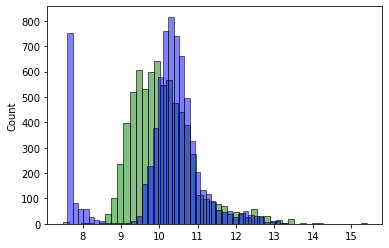

In [65]:
sns.histplot(y_pred, color = 'green', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

## RMSE

In [66]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [67]:
rmse(y_train, y_pred)

0.7554192603920132

## Validating the model

In [68]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    """ Function to prepare the feature matrix for any of the datasets"""
    df_num = df[base]
    df_num = df_num[base].fillna(0)
    X = df_num.values
    return X


In [69]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

In [70]:
rmse(y_val, y_val_pred)

0.7616530991301591

## Simple feature engineering

In [71]:
def prepare_X(df):
    """ Function to prepare the feature matrix for any of the datasets"""
    df = df.copy() # prevents function from changing original data
    df['age'] = 2027 - df.year

    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred)

0.5172055461058384

<AxesSubplot:ylabel='Count'>

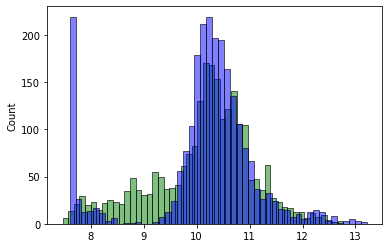

In [73]:
sns.histplot(y_val_pred, color = 'green', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

Model improved adding the age feature.
(Question how would it look keeping year?)

## Categorical variables

In [74]:
def prepare_X(df):
    """ Function to prepare the feature matrix for any of the datasets"""
    df = df.copy() # prevents function from changing original data
    features = base.copy()
    
    df['age'] = 2027 - df.year
    features.append('age') #we didn't use append before because it modified the original list

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [75]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred)

0.5157995641503003

### Using the most popular makes

In [77]:
makes = list(df_train.make.value_counts().head().index)

In [78]:
def prepare_X(df):
    """ Function to prepare the feature matrix for any of the datasets"""
    df = df.copy() # prevents function from changing original data
    features = base.copy()
    
    df['age'] = 2027 - df.year
    features.append('age') #we didn't use append before because it modified the original list

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred)

0.5076038849559554

Using the other categorical values

In [80]:
car_df.dtypes[car_df.dtypes == object].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [81]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
    ]

In [82]:
categories = {}

for c in categorical_variables:
    categories[c] = list(car_df[c].value_counts().head().index)

In [83]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [84]:
def prepare_X(df):
    """ Function to prepare the feature matrix for any of the datasets"""
    df = df.copy() # prevents function from changing original data
    features = base.copy()
    
    df['age'] = 2027 - df.year
    features.append('age') #we didn't use append before because it modified the original list

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for name, values in categories.items():
       for value in values:
        df['%s_%s' % (name, value)] = (df[name] == value).astype('int')
        features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred)

268.27304445509264

In [86]:
print(w0, w)

-3.783640092039098e+16 [-5.99724138e-01  7.06810822e+01  9.89565960e+00  4.27324737e+00
  2.47632655e-04  4.87384835e+00 -5.43959609e+03 -5.41690539e+03
 -5.36208639e+03 -1.39537169e+01  3.44344229e+01 -5.77388306e+01
 -1.83003974e+01  1.75095733e+01 -6.88928954e+02 -6.11533010e+02
 -6.93829836e+02 -6.14768773e+02 -8.73839210e+02  3.75932912e+16
  3.75932912e+16  3.75932912e+16  3.75932912e+16  3.75932912e+16
  2.43109694e+14  2.43109694e+14  2.43109694e+14  2.43109694e+14
  6.04307048e+00 -4.15348938e+00 -1.02966766e+01 -1.06484947e+01
 -4.84722048e+01  9.37859100e+01  1.30845887e+02  1.41951844e+02
 -4.85492239e-02  5.44797374e-02  1.78241160e-01  3.41906701e-01
 -1.64412078e-01]


## Regularization
Regularization helps avoid the increase in error due to large weights

In [87]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # regularize the gram matrix to control weights
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [88]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r =0.01)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred)

0.4565229884456589

## Tuning the model

In [89]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_val_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_val_pred)
    print(r, w0, score)

0.0 -3.783640092039098e+16 268.27304445509264
1e-05 6.341009818437167 0.4565170180911414
0.0001 6.812291520921018 0.4565170747161028
0.001 6.824756304749494 0.4565176075715456
0.1 6.722798498032697 0.45657984460531365
1 6.116281985366166 0.45737186434136073
10 4.598134798372568 0.4731208542892809


In [90]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_val_pred)
score

0.4565176075715456

## Using the model
Train the model using the train and validation data frames and use the test data to calculate the error.

In [91]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [92]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [93]:
y_full_train = np.concatenate([y_train, y_val])

In [94]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [95]:
(w0, w)

(6.866488398539527,
 array([ 1.52508539e-03,  1.18188514e-01, -6.66084671e-03, -5.33395322e-03,
        -4.87600677e-05, -9.69087744e-02, -7.92528581e-01, -8.90768073e-01,
        -6.35006947e-01, -4.14339241e-02,  1.75559903e-01, -5.76891776e-04,
        -1.00563502e-01, -9.27553396e-02, -4.66852648e-01,  7.98725070e-02,
        -3.16040119e-01, -5.51974395e-01, -7.89472817e-02,  1.20253036e+00,
         1.02722173e+00,  1.25679902e+00,  2.75992261e+00,  6.17151764e-01,
         1.76543813e+00,  1.66614262e+00,  1.75332194e+00,  1.68132156e+00,
        -9.70549364e-02,  3.73073435e-02, -5.81775340e-02, -2.35946679e-02,
        -1.19353409e-02,  2.37006779e+00,  2.25569765e+00,  2.24028208e+00,
        -5.00809981e-02,  5.62186471e-02,  1.84794106e-01,  3.32646971e-01,
        -1.58818460e-01]))

In [96]:
X_test = prepare_X(df_test)
y_test_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_test_pred)
score

0.451774965457475

In [97]:
# This is usually how requests look like
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [98]:
# convert to a data frame because our prepare_X expects this type of data
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [99]:
X_small = prepare_X(df_small)
# question what is happening with the categorical variables?

In [100]:
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 1.200e+01,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [101]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.46265035])

In [102]:
np.expm1(y_pred)

array([34983.1490428])

In [103]:
y_test[20]

10.463131911491967

In [104]:
np.expm1(y_test[20])

35000.00000000001